In [1]:
# Import required packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in data
wine_df = pd.read_csv('winequality-red.csv', sep=',')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

# notice that there are no non-null values which is important, as it impacts pre-processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# pre-processing 
# create two bins
bins = ([2, 6.5, 8])  # this define the definition of 'good' and 'bad'
group_names = ['bad', 'good']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names) # replacing 'quality' with bins
wine_df['quality'].unique() # we can see that we have now converted the wine quality column to simply 'bad' or 'good'

[bad, good]
Categories (2, object): [bad < good]

In [9]:
# now we can encode the 'quality' column with a numeric representation using label_encoder ('bad' = 0, 'good' = 1)
label_quality = LabelEncoder()
wine_df['quality'] = label_quality.fit_transform(wine_df['quality']) # fit_transform a very common pre-processing tool

In [13]:
wine_df['quality'].value_counts()  # basically a groupby count

0    1382
1     217
Name: quality, dtype: int64

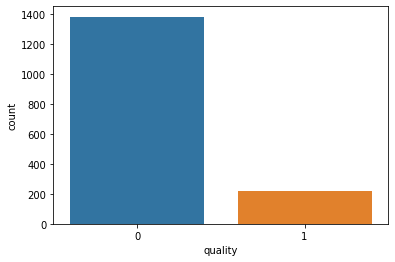

In [15]:
# now plot this on a graph
sns.countplot(wine_df['quality'])

In [18]:
# Now we want to seperate the data set as response variable and feature variables
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [19]:
# Train and Test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Apply Standard scaling to get optimised result. Some models do not need this but most do. 
# Looking at the wine_df dataset, we can see that the number range is very different in each column, therefore
# we want to normalise them

sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # we want the use the same fit for our testing and training data sets
X_test = sc.transform(X_test)

# Random Forest Classifier

In [30]:
# We can now start modelling, yay!

# let's instantiate the clssifier object
rfc = RandomForestClassifier(n_estimators=200)   
# n_estimators is the number of trees, usually we start with a higher number, then we bring it down to see how it 
# affects the confusion matrix

rfc.fit(X_train, y_train) # programme the model to fix the training data
pred_rfc = rfc.predict(X_test) # use model to predict on test data

In [34]:
# Now we want to measure how well our model performs on the test data
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# The model is good at predicting bad wine, but not so good at predicting good wine!
# Random forest is typically quite good at making prediction on data where we have bins

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


# SVM Classifier

In [36]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [37]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Network

In [40]:
# Neural Network is quite good if the problem is time sensitive, on texts, high volumes of data, picture procesing

In [42]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)

# hidden layers, 3 layers of 11 each because we have 11 features. 3 layers typically is a good place to start.
# we can over fit with too many layers and its more resource intensive
# we should also have more iterations if we have more layers

mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.64      0.57      0.61        47

    accuracy                           0.89       320
   macro avg       0.79      0.76      0.77       320
weighted avg       0.89      0.89      0.89       320

[[258  15]
 [ 20  27]]


In [45]:
# print out the precision figure is typically helpful for stakeholders

from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.896875